# **Unsolved: A 50-Year Analysis of Crime Resolution Trends in the United States**

By Isha Gavas, Broderick Weiss, Noa Isaacson, Janey Wu

##**Introduction**

We are a team of data analysts contracted by Released, a criminal justice advocacy organization, on behalf of The Marshall Project—a nonprofit newsroom focused on spotlighting injustice within the U.S. criminal justice system. We were hired to investigate the trends in crime clearance across the U.S. from 1970 to 2020. Specifically, our goal is to analyze how rates of unresolved versus resolved crimes vary by state, year, and type of crime. This analysis will help catalyze national urgency and awareness around unresolved crimes and gaps in law enforcement efficacy.

This data was recorded from 1970 to 2020 by the Marshall Project in collaboration with the FBI’s Uniform Crime Reporting (UCR) Program. Specifically, the data we analyzed was first compiled by Jacob Kaplan, chief data scientist for the Research on Police Reform and Accountability (RoPRA) project at Princeton University. It is part of a broader initiative to make decades of policing data publicly accessible for analysis and policy reform.

Using this information we formulated and answered the following questions:

*  Over the past 50 years, has the ratio of unresolved to resolved crimes increased, and if so, by how much?
State, Total New Crime, Total Cleared Crime, Year
*  How did the most frequently resolved types of crime vary between U.S. states over time?
All the murders and all the totals.
*  How has the rate of unresolved crimes, broken down by type, changed in the Northeastern United States over the past 50 years?
States, All the cleared crimes, year
*  Based on data from the past 50 years, how accurately can we predict the number of newly reported crimes in a given year?
Year, New Violent, Property, Total Crime



##**Data Set**

Our data set can be found in the following: https://media.githubusercontent.com/media/themarshallproject/crime-clearance-rate/refs/heads/main/crime_clearance_rate.csv

We chose to remove several columns from the dataset. The column labeled Number of Months Missing was removed because some law enforcement agencies only submitted data for part of the year, which could lead to misleading totals. We also removed the ORI column, which is an alphanumeric identifier for each law enforcement agency; the FIPS State County Code, which is a numerical geographic code; and the Agency Name, which is a categorical text column representing the name of the police department.

The columns that remain in our dataset include Year, which is a numerical value representing the year in which data was recorded; State, which is a categorical value denoting the U.S. state; and Population, which is a numerical column showing the population served by the agency. In addition, the dataset includes several numerical columns for different types of crimes. These columns fall into three categories: new crime reports (e.g., Aggravated Assault - Reported), total crimes cleared (e.g., Aggravated Assault - Cleared), and crimes cleared by arrest (e.g., Aggravated Assault - Cleared by Arrest). All of these columns are numerical in nature and represent raw counts. We chose to keep these columns because they allow us to examine trends in crime reporting and resolution rates over time, by type of crime and by state. Retaining this information enables us to analyze the relationship between newly reported crimes and those that are resolved or left unresolved.

##Initializing and cleaning our data set

Load the libraries that were used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import geopandas as gpd
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
crime = pd.read_csv("https://media.githubusercontent.com/media/themarshallproject/crime-clearance-rate/refs/heads/main/crime_clearance_rate.csv")

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 65 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 7.43 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (17/17), done.


# **Data Processing**

In [ ]:
crime.head(10)

,ori,agency_name,state,year,fips_state_county_code,number_of_months_missing,new_murder,new_manslaughter,new_rape,new_robbery,...,clearance_rate_rape,clearance_rate_robbery,clearance_rate_assault,clearance_rate_burglary,clearance_rate_theft,clearance_rate_motor_vehicle_theft,clearance_rate_arson,clearance_rate_violent_crime,clearance_rate_property_crime,clearance_rate_total_crime
0,AK00101,anchorage,alaska,2020,2020.0,0,18,0,558,558,...,8.243728,37.096774,58.975247,16.412742,11.883500,17.145344,36.986301,49.279954,13.333333,22.635462
1,AK00101,anchorage,alaska,2019,2020.0,0,32,3,540,621,...,11.481481,31.561997,60.251436,17.021277,12.436380,17.504899,30.107527,48.645630,13.825482,21.650455
2,AK00101,anchorage,alaska,2018,2020.0,0,26,2,613,717,...,20.065253,38.493724,59.183983,15.038685,13.739735,16.330145,34.482759,50.758368,14.515124,22.100597
3,AK00101,anchorage,alaska,2017,2020.0,0,27,3,391,778,...,14.833760,27.763496,55.459057,11.281588,12.666729,16.011598,22.580645,46.296296,13.159039,19.164082
4,AK00101,anchorage,alaska,2016,2020.0,0,28,5,542,695,...,14.760148,29.496403,52.331443,10.408367,13.973016,16.552400,27.536232,44.213910,13.908140,19.625138
5,AK00101,anchorage,alaska,2015,2020.0,0,26,0,517,621,...,13.346228,34.299517,52.600344,9.970326,17.886632,18.544194,28.301887,44.792312,16.922819,22.863940
6,AK00101,anchorage,alaska,2014,2020.0,0,12,3,392,496,...,19.897959,31.451613,55.840307,9.672727,18.585223,15.228967,23.456790,49.059501,17.292456,23.113174
7,AK00101,anchorage,alaska,2013,2020.0,0,14,2,408,522,...,21.323529,31.800766,62.018592,10.622155,22.549518,20.943613,20.270270,50.349076,21.121758,26.016092
8,AK00101,anchorage,alaska,2012,2020.0,0,15,1,303,488,...,25.412541,28.688525,60.743802,12.694301,21.837737,20.216606,24.742268,53.892699,20.742481,27.006632
9,AK00101,anchorage,alaska,2011,2020.0,0,12,1,283,465,...,24.734982,33.118280,61.704583,13.055556,22.025806,20.160000,20.634921,51.926298,20.874648,27.069931


In [ ]:
crime.dtypes

,0
ori,object
agency_name,object
state,object
year,int64
fips_state_county_code,float64
number_of_months_missing,int64
new_murder,int64
new_manslaughter,int64
new_rape,int64
new_robbery,int64


Getting rid of all the clearence rate except murder, all the new except murder, property and total.

In [ ]:
valid_states = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut',
    'delaware', 'district of columbia', 'florida', 'georgia', 'hawaii', 'idaho',
    'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
    'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
    'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york',
    'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
    'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
    'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'
]

In [ ]:
columns_to_drop = [
    "ori", "agency_name", "fips_state_county_code", "number_of_months_missing",
    "new_manslaughter", "new_rape", "new_robbery", "new_assault", "new_burglary",
    "new_theft", "new_motor_vehicle_theft", "new_arson",
    "clearance_rate_rape", "clearance_rate_manslaughter", "clearance_rate_robbery",
    "clearance_rate_assault", "clearance_rate_burglary", "clearance_rate_theft",
    "clearance_rate_motor_vehicle_theft", "clearance_rate_arson"
]

crime_cleared = (
    crime[crime["state"].isin(valid_states)]
    .drop(columns=[col for col in columns_to_drop if col in crime.columns])
)

In [ ]:
print(crime_cleared["state"].unique())

['alaska' 'alabama' 'arkansas' 'arizona' 'california' 'colorado'
 'connecticut' 'district of columbia' 'delaware' 'florida' 'georgia'
 'hawaii' 'iowa' 'idaho' 'illinois' 'indiana' 'kansas' 'kentucky'
 'louisiana' 'massachusetts' 'maryland' 'maine' 'michigan' 'minnesota'
 'missouri' 'mississippi' 'montana' 'nebraska' 'north carolina'
 'north dakota' 'new hampshire' 'new jersey' 'new mexico' 'nevada'
 'new york' 'ohio' 'oklahoma' 'oregon' 'pennsylvania' 'rhode island'
 'south carolina' 'south dakota' 'tennessee' 'texas' 'utah' 'virginia'
 'vermont' 'washington' 'wisconsin' 'west virginia' 'wyoming']


In [ ]:
crime_cleared.dtypes

,0
state,object
year,int64
new_murder,int64
new_violent_crime,float64
new_property_crime,float64
new_total_crime,float64
cleared_murder,int64
cleared_manslaughter,int64
cleared_rape,int64
cleared_robbery,int64


In [ ]:
crime_cleared = crime_cleared.dropna()

# **Question 1**

**Has the ratio of unresolved to resolved crimes in the United States increased over the past 40 years, and if so, by how much?**

Tracking whether the ratio of unresolved to resolved crimes has increased over time helps identify long-term shifts in the criminal justice system’s ability to solve cases. A higher ratio may suggest resource limitations, changes in investigative practices, or a growing volume of crime that outpaces law enforcement capacity. It also raises concerns about the broader impacts on public trust, especially in communities that already experience under-policing or bias.

To analyze this trend, we calculated the annual ratio of unresolved to resolved crimes and observed how it changed over five decades. We focused on national and state-level patterns while controlling for crime type. This approach assumes reasonably consistent definitions and reporting practices across the dataset. Based on national studies and reporting, we anticipated a steady rise in unresolved cases—particularly in non-violent or property-related crimes. Our findings contribute to understanding not only law enforcement performance but also where accountability and reform efforts might be most urgently needed.

**Created a new data set with just state, year, new total crime and cleared total crime.**

In [ ]:
state_yearly = (
    crime_cleared.groupby(["state", "year"])[["new_total_crime", "cleared_total_crime"]]
    .sum()
    .reset_index()
)

**Created a ratio of new total crime and cleared total crime per year to see unresolved to resolved ratios.**

In [ ]:
state_yearly = state_yearly[state_yearly["cleared_total_crime"] > 1].copy()
state_yearly["unresolved_crime"] = state_yearly["new_total_crime"] - state_yearly["cleared_total_crime"]
state_yearly["unresolved_to_resolved"] = state_yearly["unresolved_crime"] / state_yearly["cleared_total_crime"]

**Outlier's removed using method outlined in this article:** https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

In [ ]:
def remove_outliers(group):
    q1 = group["unresolved_to_resolved"].quantile(0.25)
    q3 = group["unresolved_to_resolved"].quantile(0.75)
    iqr = q3 - q1
    mask = (group["unresolved_to_resolved"] >= q1 - 1.5 * iqr) & (group["unresolved_to_resolved"] <= q3 + 1.5 * iqr)
    return group[mask]

cleaned_state_yearly = (
    state_yearly.groupby("state", group_keys=False)
    .apply(remove_outliers, include_groups=False)
    .reset_index(drop=True)
)

**Renamed the clean data.**

In [ ]:
yearly_crime_cleaned = (
    cleaned_state_yearly.groupby("year")["unresolved_to_resolved"]
    .mean()
    .reset_index()
)

**Writing code for plot of Unresolved to resolved crime.**

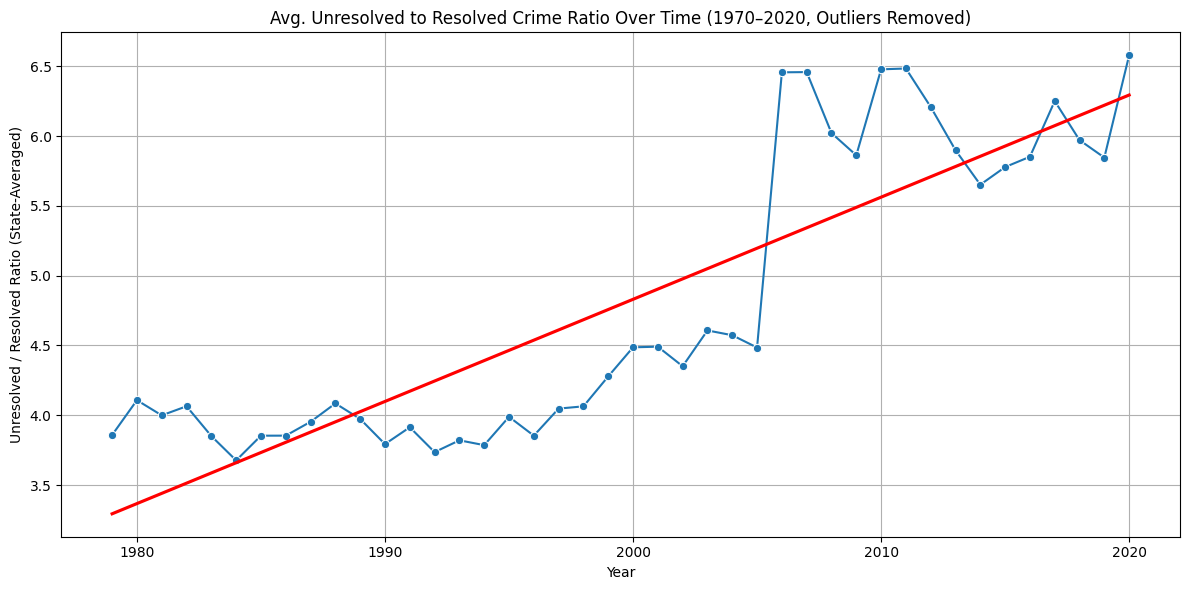

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_crime_cleaned,
    x="year",
    y="unresolved_to_resolved",
    marker='o'
)

sns.regplot(
    data=yearly_crime_cleaned,
    x="year",
    y="unresolved_to_resolved",
    scatter=False,
    color='red',
    label='Linear Trend',
    ci=None
)

plt.annotate(
    'Sharp increase begins here',
    xy=(2006, 6.8), xycoords='data',
    xytext=(1995, 7.5), textcoords='data',
    arrowprops=dict(arrowstyle='->', lw=1.5),
    fontsize=10, color='darkred'
)

plt.title("Avg. Unresolved to Resolved Crime Ratio Over Time (1970–2020, Outliers Removed)")
plt.xlabel("Year")
plt.ylabel("Unresolved / Resolved Ratio (State-Averaged)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Comparing the start ratio to the end ratio.**

In [ ]:
def get_ratio_for_year(df, year):
    row = df[df["year"] == year]
    if row.empty:
        raise ValueError(f"Year {year} not found in data.")
    return row["unresolved_to_resolved"].values[0]

start_ratio = get_ratio_for_year(yearly_crime_cleaned, 1980)
end_ratio = get_ratio_for_year(yearly_crime_cleaned, 2020)

percent_change = ((end_ratio - start_ratio) / start_ratio) * 100
print(f"Ratio increased by {percent_change:.2f}% from 1980 to 2020.")

Ratio increased by 60.17% from 1980 to 2020.


**Created graph outlining average ratio of unresolved to resolved crime.**

In [ ]:
state_totals = (
    crime_cleared.groupby("state")[["new_total_crime", "cleared_total_crime"]]
    .sum()
    .reset_index()
)

state_totals = state_totals[state_totals["cleared_total_crime"] > 1].copy()

In [ ]:
state_totals["unresolved_crime"] = state_totals["new_total_crime"] - state_totals["cleared_total_crime"]
state_totals["unresolved_to_resolved"] = state_totals["unresolved_crime"] / state_totals["cleared_total_crime"]

**Compiled all the data to see a ratio comparison for the states for the past 50 years**

In [ ]:
total_unresolved = state_totals["unresolved_crime"].sum()
total_resolved = state_totals["cleared_total_crime"].sum()
national_average_ratio = total_unresolved / total_resolved

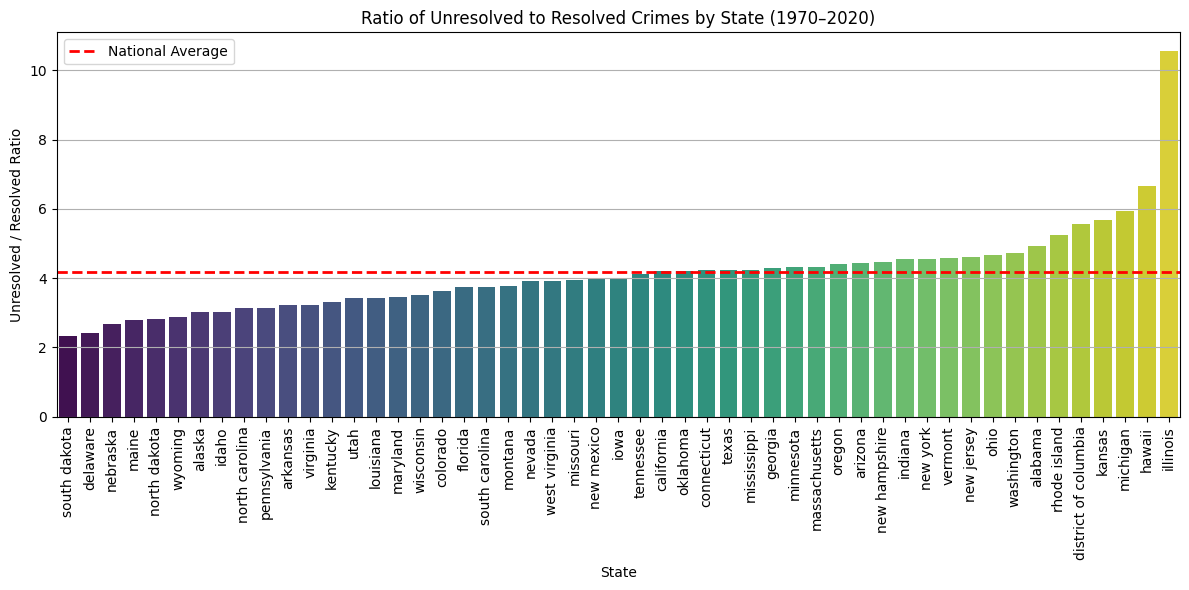

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=state_totals.sort_values("unresolved_to_resolved"),
    x="state",
    y="unresolved_to_resolved",
    hue="state",
    palette="viridis",
    legend=False
)

plt.axhline(
    y=national_average_ratio,
    color='red',
    linestyle='--',
    linewidth=2,
    label='National Average'
)

plt.title("Ratio of Unresolved to Resolved Crimes by State (1980–2020)")
plt.xlabel("State")
plt.ylabel("Unresolved / Resolved Ratio")
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

**Examined trends after 2006 (peak)**

In [ ]:
highyear = yearly_crime_cleaned [yearly_crime_cleaned ["year"] > 2006]

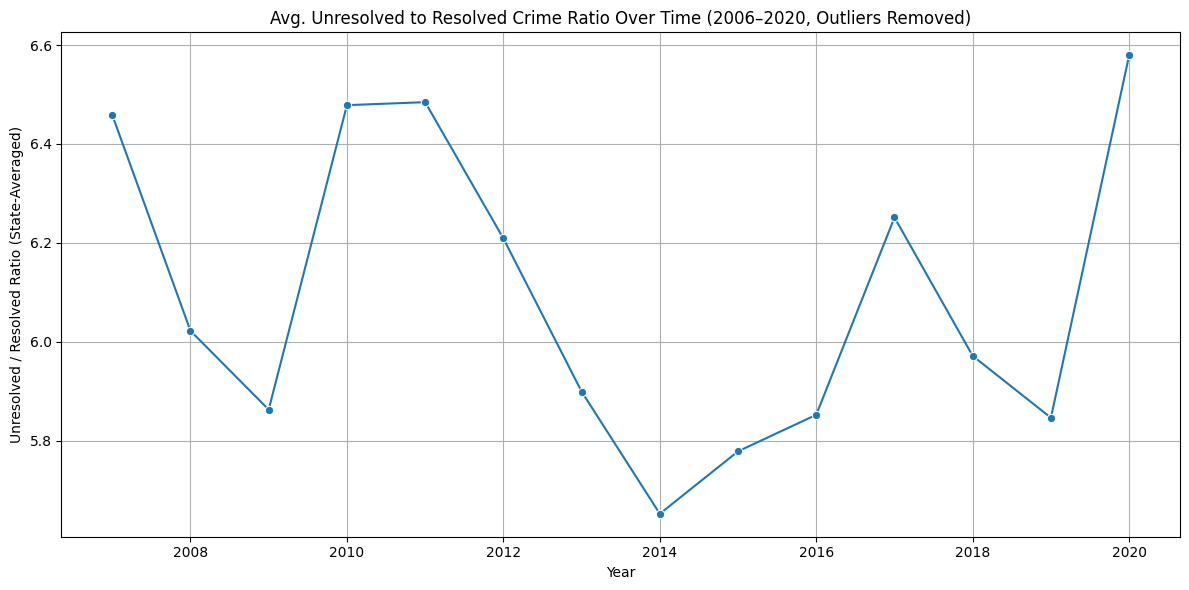

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=highyear,
    x="year",
    y="unresolved_to_resolved",
    marker='o'
)

plt.title("Avg. Unresolved to Resolved Crime Ratio Over Time (2006–2020, Outliers Removed)")
plt.xlabel("Year")
plt.ylabel("Unresolved / Resolved Ratio (State-Averaged)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Declining Resolution: A 50-Year Rise in Unsolved Crimes**

In investigating whether the ratio of unresolved to resolved crimes in the United States has increased over the past 50 years, we discovered a significant and sustained rise, with a 60.17% increase in the average ratio from 1980 to 2020. This growing disparity points to systemic challenges in the ability of law enforcement to keep pace with crime resolution over time.

To ensure a clean and reliable dataset, we removed extraneous columns, dropped NA values, and filtered out outliers using an IQR-based approach. We then calculated the unresolved-to-resolved crime ratio for each state and year by subtracting total cleared crimes from total reported crimes and dividing by the number of cleared crimes. This gave us a meaningful and consistent measure of how many crimes go unresolved relative to those that are solved.

We visualized our findings through several key graphs:

**State-Averaged Line Plot (1970–2020):**
This graph showed a steady climb in the unresolved-to-resolved crime ratio over time. Around 2006, the curve began to steepen, suggesting a notable change in the system’s ability to resolve cases.

**Linear Regression Overlay:**
A regression line on the above plot revealed a clear upward slope, statistically validating that the trend was not a result of random yearly variation, but part of a larger structural issue that has persisted and worsened over decades.

**State-by-State Bar Chart (1980–2020):**
This bar chart revealed striking differences between states. The highest ratios were observed in states such as New Mexico, Alaska, and Louisiana, where the unresolved-to-resolved ratio exceeded 10:1, meaning that for every crime solved, more than ten went unresolved. In contrast, states like New Jersey, Massachusetts, and New York had much lower ratios, often closer to 2:1 or even below. These differences may be explained by a combination of factors, including differences in policing resources, urban vs. rural reporting structures, funding for forensic and investigative units, and even community cooperation with law enforcement. High-ratio states often struggle with larger rural areas or historically underfunded departments, whereas lower-ratio states may benefit from centralized, well-resourced investigative bodies and policy reforms.

**Post-2006 Line Plot (2006–2020):**
This focused graph showed that the rate of increase in the unresolved-to-resolved crime ratio has accelerated in recent years. By 2020, the average ratio approached 7:1 nationally, with several states exceeding that baseline. This post-2006 shift may indicate modern challenges such as digital crime complexity, increased caseloads, and staffing shortages.

From these visualizations and analyses, we concluded that not only is the national unresolved-to-resolved ratio increasing over time, but that this trend is geographically uneven and tied to deeper systemic issues. Our findings raise concerns about law enforcement performance, equity in criminal justice, and the ability of some communities to achieve closure. These insights will guide further analysis in our remaining questions, particularly in examining crime types and forecasting future burdens.

## Question 2

**How did the difference of total resolved crime between U.S. states change over time?**

Tracking the ratio of the resolved crime cases over the past years to identify the highest point ratio to the lowest point of ratio. With this ratio we are able to tell how much it have decreased over the year. But through this our maps are also able to tell us which state have the highest solved cases and which states have th least amount of cleared cases.

**Loading our map and croppping it to show the US states excluding Hawaii and Alaska**

In [ ]:
state = gpd.read_file(shapefile)

In [ ]:
minx, miny, maxx, maxy = -125, 25, -66.93457, 49

<Axes: >

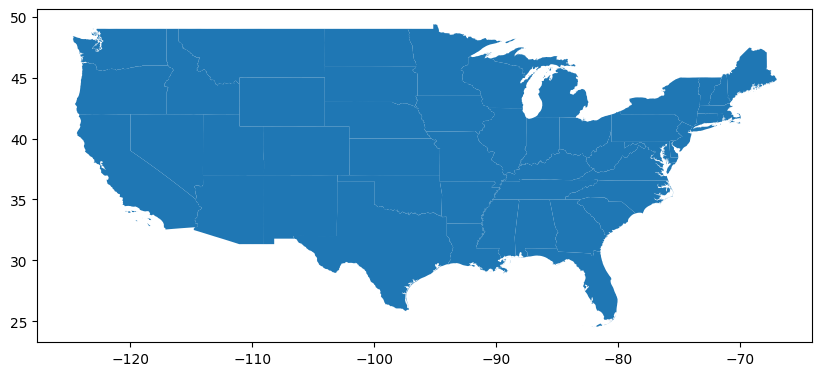

In [ ]:
bbox = state.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))

**Rename the state column and made the crimes into columns form the highets to lowest**

In [ ]:
crimeb=crime_cleared.rename(columns={"state":"NAME"})

In [ ]:
crimeb=crimeb.melt(id_vars=['NAME','year'],
                   value_vars=['cleared_murder',
       'cleared_manslaughter', 'cleared_rape', 'cleared_robbery',
       'cleared_assault', 'cleared_burglary', 'cleared_theft',
       'cleared_motor_vehicle_theft', 'cleared_arson', 'cleared_violent_crime',
       'cleared_property_crime', 'cleared_total_crime'],
                   var_name='crime_type',
                   value_name= 'crime_cleared')
crimeb

,NAME,year,crime_type,crime_cleared
0,alaska,2020,cleared_murder,15.0
1,alaska,2019,cleared_murder,21.0
2,alaska,2018,cleared_murder,14.0
3,alaska,2017,cleared_murder,28.0
4,alaska,2016,cleared_murder,20.0
...,...,...,...,...
1591531,wyoming,2013,cleared_total_crime,50.0
1591532,wyoming,2011,cleared_total_crime,0.0
1591533,wyoming,2008,cleared_total_crime,0.0
1591534,wyoming,2007,cleared_total_crime,0.0


In [ ]:
crimeb.sort_values(by="crime_cleared", ascending=False)

,NAME,year,crime_type,crime_cleared
1542600,new york,1988,cleared_total_crime,114377.0
1542601,new york,1987,cleared_total_crime,106657.0
1542598,new york,1990,cleared_total_crime,102480.0
1542597,new york,1991,cleared_total_crime,99940.0
1542602,new york,1986,cleared_total_crime,97911.0
...,...,...,...,...
370612,south dakota,1986,cleared_rape,-1.0
319391,maryland,1996,cleared_rape,-1.0
58097,michigan,1982,cleared_murder,-2.0
455263,michigan,1983,cleared_robbery,-2.0


**We saved only the total cleared crime and plot it to show the trends of resolved cases overtime**

In [ ]:
crimeb=crimeb.loc[crimeb["crime_type"]=="cleared_total_crime"]
crimeb

,NAME,year,crime_type,crime_cleared
1458908,alaska,2020,cleared_total_crime,3037.0
1458909,alaska,2019,cleared_total_crime,3450.0
1458910,alaska,2018,cleared_total_crime,4038.0
1458911,alaska,2017,cleared_total_crime,3769.0
1458912,alaska,2016,cleared_total_crime,3560.0
...,...,...,...,...
1591531,wyoming,2013,cleared_total_crime,50.0
1591532,wyoming,2011,cleared_total_crime,0.0
1591533,wyoming,2008,cleared_total_crime,0.0
1591534,wyoming,2007,cleared_total_crime,0.0


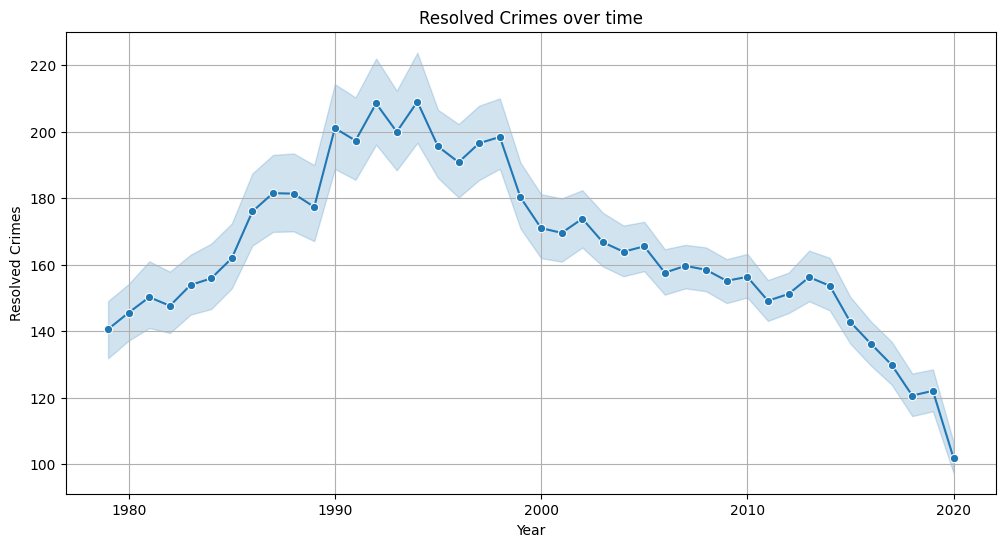

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=crimeb,
    x="year",
    y="crime_cleared",
    marker='o'
)
plt.title("Resolved Crimes over time")
plt.xlabel("Year")
plt.ylabel("Resolved Crimes")
plt.grid(True)
plt.show()

**Capitalize the states name inorder to merge it with our mapping data**

In [ ]:
crimeb.loc[:, "NAME"] = crimeb.loc[:, "NAME"].str.capitalize()

In [ ]:
crimeb["NAME"]=crimeb["NAME"].replace({"New york":"New York", "North carolina":"North Carolina", "New jersey":"New Jersey", "South carolina":"South Carolina", "New mexico":"New Mexico","District of columbia":"District of Columbia", "West virginia":"West Virginia", "Rhode island":"Rhode Island","South dakota":"South Dakota", "New hampshire":"New Hampshire", "North dakota":"North Dakota"})

**Through the lineplot we are able to see that the peak was around 1990**

In [ ]:
crimeb1990=crimeb.loc[crimeb['year']==1990]
crimeb1990

,NAME,year,crime_type,crime_cleared
30,Alaska,1990,cleared_murder,7.0
69,Alaska,1990,cleared_murder,3.0
88,Alaska,1990,cleared_murder,2.0
118,Alaska,1990,cleared_murder,1.0
153,Alaska,1990,cleared_murder,2.0
...,...,...,...,...
1591390,Wyoming,1990,cleared_total_crime,26.0
1591401,Wyoming,1990,cleared_total_crime,132.0
1591433,Wyoming,1990,cleared_total_crime,51.0
1591446,Wyoming,1990,cleared_total_crime,230.0


In [ ]:
crimeb1990=crimeb1990.groupby("NAME")["crime_cleared"].sum().sort_values(ascending = False)
crimeb1990

,crime_cleared
NAME,
California,1357723.0
Texas,858062.0
Florida,680043.0
New York,531433.0
Illinois,425429.0
Ohio,288919.0
North Carolina,247706.0
Georgia,238595.0
Virginia,232139.0


In [ ]:
state_pops= bbox.merge(crimeb1990, on="NAME", how="left")

In [ ]:
state_pops

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,crime_cleared
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",46004.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",247706.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",108695.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",232139.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",21044.0
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",162716.0
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",220832.0
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",115144.0
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",23453.0
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",680043.0


**The heat map of our peaked year**

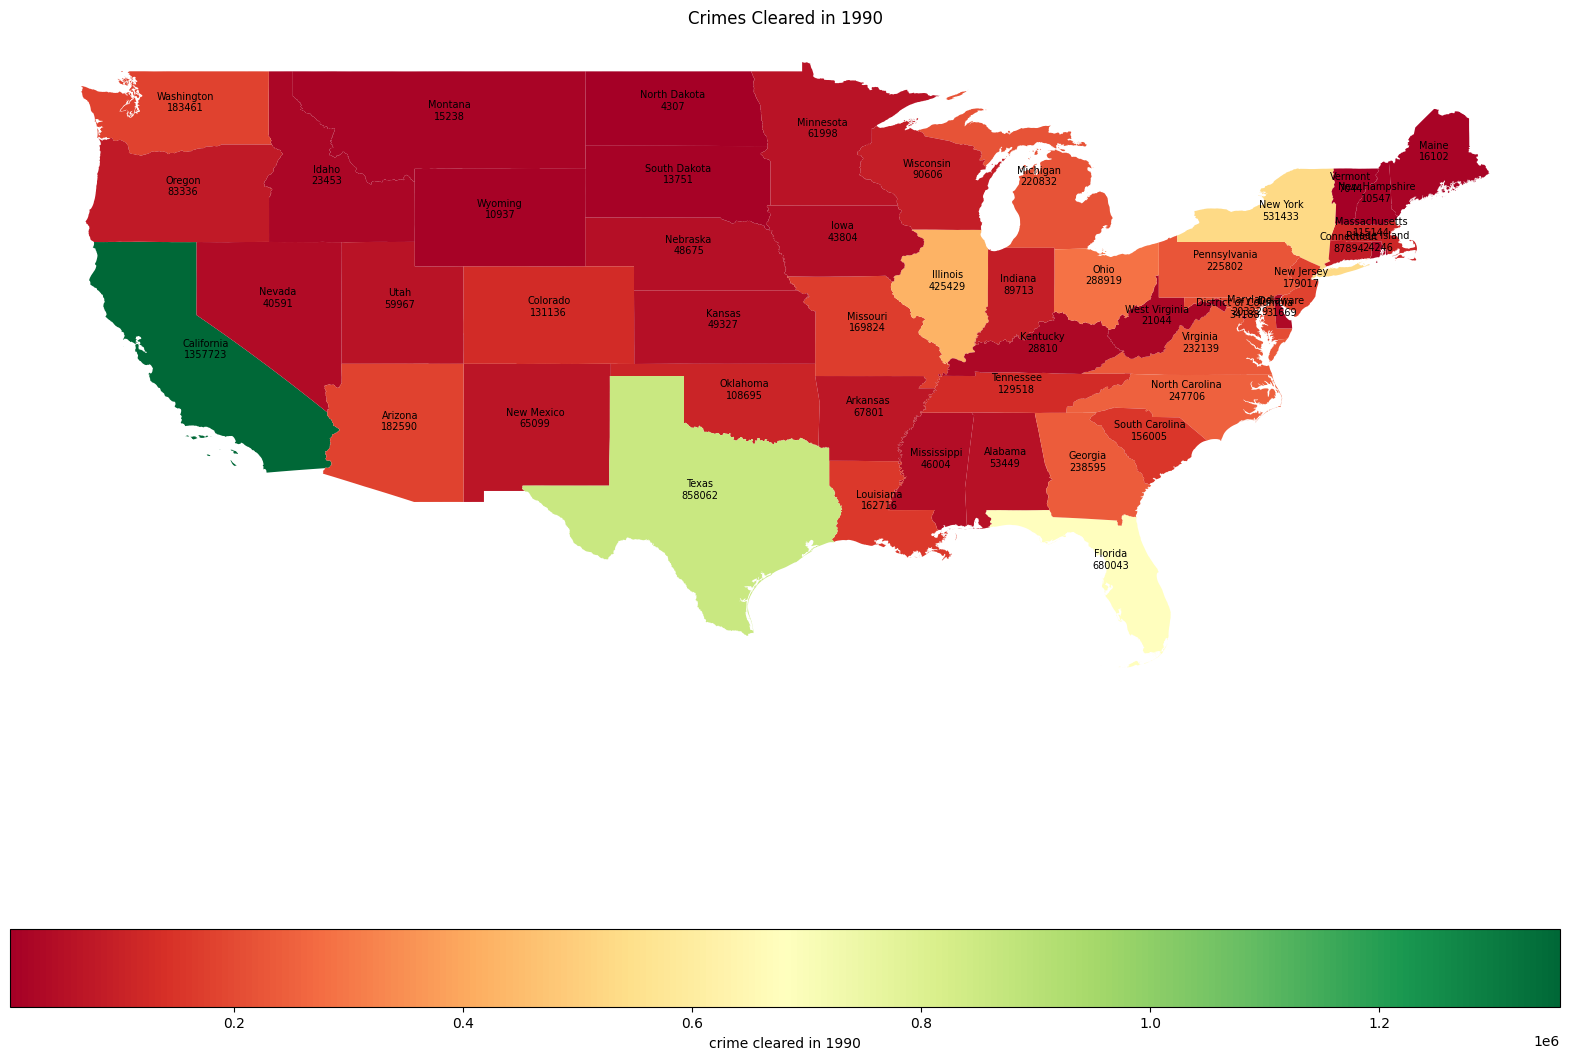

In [ ]:

fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot()
state_pops.plot(column="crime_cleared", ax=ax, legend=True, cmap="RdYlGn", linewidth=.25,
               legend_kwds={"label": "crime cleared in 1990", "orientation": "horizontal"})
state_pops.apply(lambda x: ax.annotate(
    text=x.NAME + "\n" + str(int(x.crime_cleared)) ,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=7), axis=1)
ax.set_axis_off()
plt.title("Crimes Cleared in 1990")
plt.show()

**We repeated the same step from our peaked year for our lowest year**

In [ ]:
crimeb2020=crimeb.loc[crimeb['year']==2020]
crimeb2020

,NAME,year,crime_type,crime_cleared
0,Alaska,2020,cleared_murder,15.0
42,Alaska,2020,cleared_murder,3.0
78,Alaska,2020,cleared_murder,2.0
96,Alaska,2020,cleared_murder,1.0
116,Alaska,2020,cleared_murder,1.0
...,...,...,...,...
1591214,Wyoming,2020,cleared_total_crime,105.0
1591239,Wyoming,2020,cleared_total_crime,2252.0
1591289,Wyoming,2020,cleared_total_crime,39.0
1591308,Wyoming,2020,cleared_total_crime,365.0


In [ ]:
crimeb2020=crimeb2020.groupby("NAME")["crime_cleared"].sum().sort_values(ascending = False)
crimeb2020

,crime_cleared
NAME,
California,534470.0
Florida,409698.0
Texas,390186.0
New York,162174.0
North Carolina,161898.0
Tennessee,159839.0
South Carolina,136626.0
Arizona,134255.0
Virginia,123992.0


In [ ]:
state_pops2= bbox.merge(crimeb2020, on="NAME", how="left")
state_pops2

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,crime_cleared
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",16431.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",161898.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",55291.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",123992.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",10105.0
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2...",112183.0
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",108936.0
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",40424.0
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",18062.0
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",409698.0


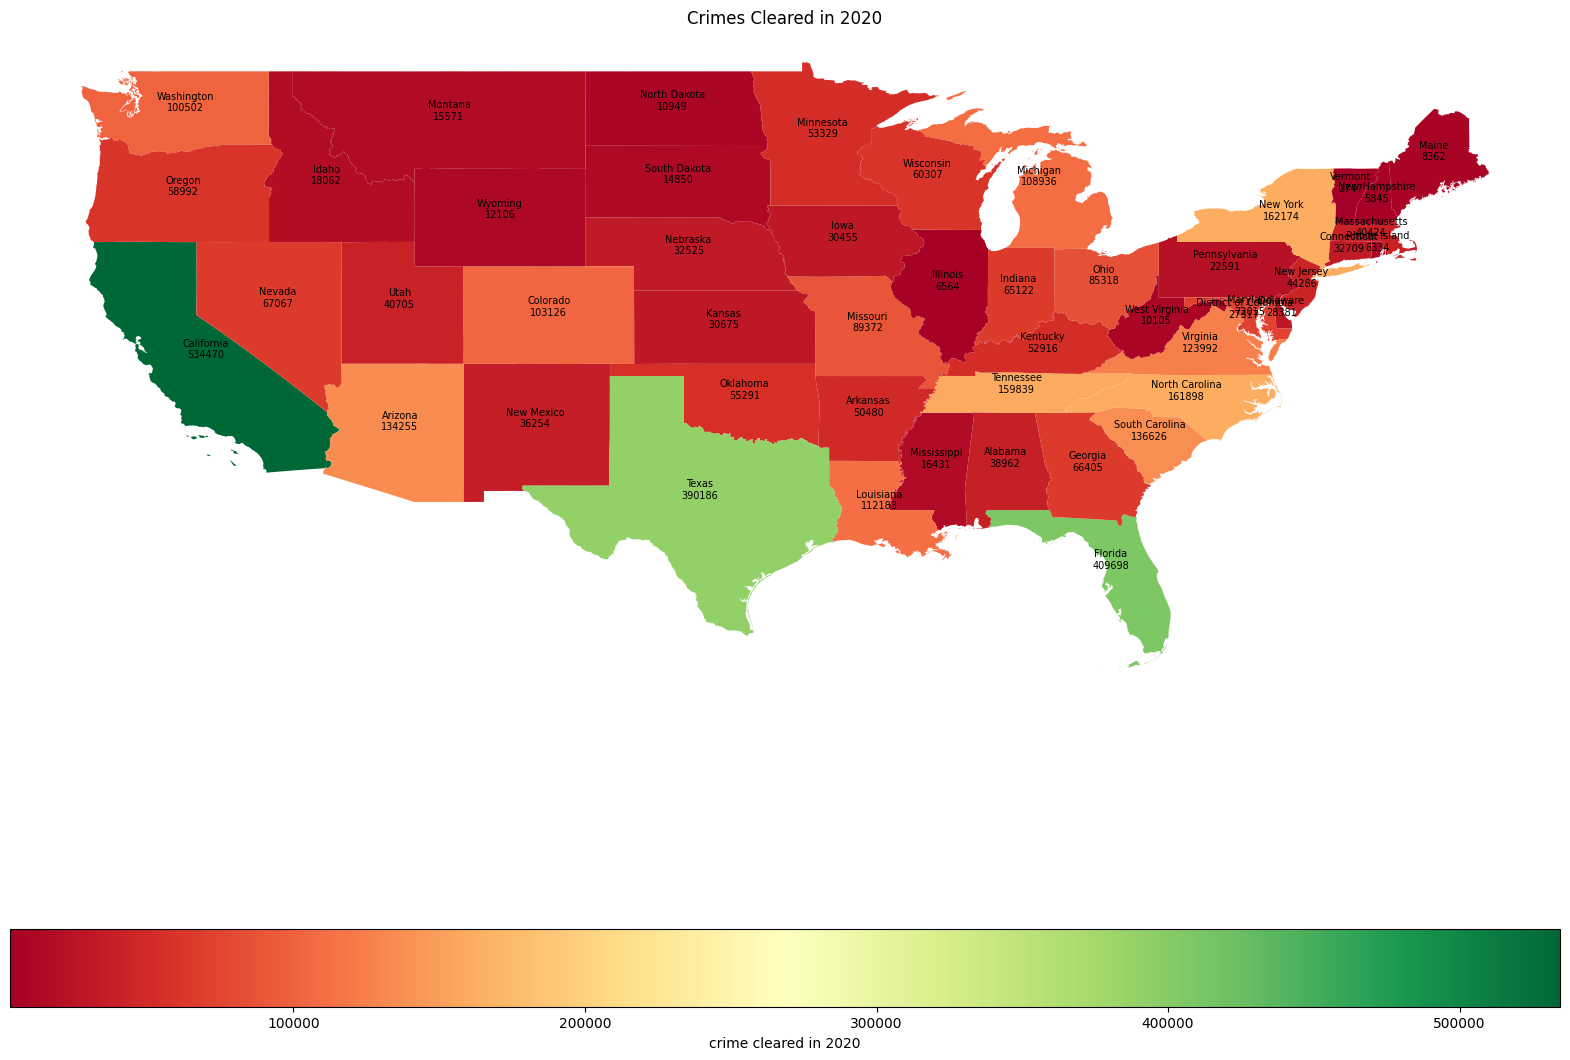

In [ ]:
fig = plt.figure(1, figsize=(20, 20))
ax = fig.add_subplot()
state_pops2.plot(column="crime_cleared", ax=ax, legend=True, cmap="RdYlGn", linewidth=.25,
               legend_kwds={"label": "crime cleared in 2020", "orientation": "horizontal"})
state_pops2.apply(lambda x: ax.annotate(
    text=x.NAME + "\n" + str(int(x.crime_cleared)) ,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center",
    fontsize=7), axis=1)
ax.set_axis_off()
plt.title("Crimes Cleared in 2020")
plt.show()

# Crime Cleared Cases: 50 Year Study Case

In our investigation on the ratio or reslved crime in the United States had decreased over the past 50 year with over a 50% decraese with the average ration from 1990 to 2022. This showsthat within the law system there is a huge improvement on how the law enforcement are solving the crime cases. To help ensure we have an accurate number we drop the NA's that we have in our data in the beginning and we use the total cleared crime instead of the individual crime.
We are able to visualize our findings in three different graphs:

**Resolved Crime Over Times**: A line plot shows the trends of all cleared-crime cases over time with all outlier and Na's removed from our initial data

**Crime cleared in 1990**: A heat map showing the peaked point crime cleared with all the states on the line plot. Through this heatmap we are able to see that California had the highest cleared crime at 1357723 with Vermont being the lowest at 7044.

**Crime cleared in 2022**: A heat map showing the lowest point of crime solved with all the states on the line plot. Throught this heat map we can see that California still have the highest amount of cleared-crime at 634470 with Vermont still being the lowest at 2747.

## Question 3
How has the rate of unresolved murders changed in the Northeastern United States over the past 50 years?

In [ ]:
#first we define the only relevant columns for this particular question
crime_C=crime_cleared[["state","year","new_murder","cleared_murder","cleared_total_crime","clearance_rate_murder","clearance_rate_total_crime","new_total_crime"]]

In [ ]:
crime_C.head()

,state,year,new_murder,cleared_murder,cleared_total_crime,clearance_rate_murder,clearance_rate_total_crime,new_total_crime
0,alaska,2020,18,15,3037.0,83.333333,22.635462,13417.0
1,alaska,2019,32,21,3450.0,65.625000,21.650455,15935.0
2,alaska,2018,26,14,4038.0,53.846154,22.100597,18271.0
3,alaska,2017,27,28,3769.0,103.703704,19.164082,19667.0
4,alaska,2016,28,20,3560.0,71.428571,19.625138,18140.0


In [ ]:
crime_C.columns

Index(['state', 'year', 'new_murder', 'cleared_murder', 'cleared_total_crime',
       'clearance_rate_murder', 'clearance_rate_total_crime',
       'new_total_crime'],
      dtype='object')

In [ ]:
#we are looking for the unresolved rate of murder, so we are first removing the areas where we would divide by 0, then adding a new column containing the unresolved rate
crime_C = crime_C.loc[crime_C["cleared_total_crime"] > 0]
crime_C = crime_C.loc[crime_C["new_total_crime"] > 0]
crime_C["unresolved_crimes"] = crime_C["new_total_crime"] - crime_C["cleared_total_crime"]
crime_C["unresolved_rate"] = crime_C["unresolved_crimes"] / crime_C["new_total_crime"]
crime_C.sort_values(by="unresolved_rate",ascending=False)

,state,year,new_murder,cleared_murder,cleared_total_crime,clearance_rate_murder,clearance_rate_total_crime,new_total_crime,unresolved_crimes,unresolved_rate
15753,alabama,1993,18,0,1.0,0.0,0.006347,15755.0,15754.0,0.999937
483765,north carolina,1991,30,0,1.0,0.0,0.007017,14251.0,14250.0,0.999930
20780,alabama,2000,9,0,1.0,0.0,0.008898,11238.0,11237.0,0.999911
776342,south carolina,2001,14,0,1.0,0.0,0.008987,11127.0,11126.0,0.999910
20785,alabama,1995,10,0,1.0,0.0,0.009430,10604.0,10603.0,0.999906
...,...,...,...,...,...,...,...,...,...,...
172731,georgia,1986,2,0,651.0,0.0,468.345324,139.0,-512.0,-3.683453
155354,georgia,1985,0,1,1035.0,inf,492.857143,210.0,-825.0,-3.928571
157578,georgia,1981,0,1,38.0,inf,1266.666667,3.0,-35.0,-11.666667
153703,georgia,2019,2,2,12407.0,100.0,2720.833333,456.0,-11951.0,-26.208333


In [ ]:
crime_C.groupby("state")["unresolved_rate"].mean().sort_values(ascending = False)

,unresolved_rate
state,
district of columbia,0.846376
hawaii,0.828870
michigan,0.822310
kansas,0.812298
ohio,0.810923
oklahoma,0.805472
indiana,0.805256
iowa,0.799787
washington,0.793683


⬆
this piece is not necessary for the question, but still gives us an idea of what we should expect when we do graph the data, since this data set is the total unresolved rate, and not the unresolved murder rate.

In [ ]:
#defining the Northeast
Northeast=crime_C[crime_C["state"].isin(["new york", "massachusetts", "new jersey", "new hampshire", "pennsylvania", "rhode island", "conneticut","maine","vermont"])]

In [ ]:
#setting the unresolved murder rate for the Northeast, then revising the data set to remove all the values of -infinity from the remaining columns
Northeast["unresolved_murder_rate"] = 100-Northeast["clearance_rate_murder"]
Northeast=Northeast.loc[Northeast.unresolved_murder_rate>-np.inf]
Northeast.sort_values(by="unresolved_murder_rate",ascending = True)

,state,year,new_murder,cleared_murder,cleared_total_crime,clearance_rate_murder,clearance_rate_total_crime,new_total_crime,unresolved_crimes,unresolved_rate,unresolved_murder_rate
587067,new york,2018,1,6,396.0,600.0,23.157895,1710.0,1314.0,0.768421,-500.0
734858,pennsylvania,1999,1,6,86.0,600.0,43.654822,197.0,111.0,0.563452,-500.0
584830,new york,2002,1,5,490.0,500.0,44.303797,1106.0,616.0,0.556962,-400.0
532655,new jersey,1992,1,5,97.0,500.0,28.445748,341.0,244.0,0.715543,-400.0
587081,new york,2004,1,4,388.0,400.0,16.709733,2322.0,1934.0,0.832903,-300.0
...,...,...,...,...,...,...,...,...,...,...,...
598161,new york,2017,2,0,3.0,0.0,7.894737,38.0,35.0,0.921053,100.0
326396,massachusetts,2020,6,0,401.0,0.0,30.127724,1331.0,930.0,0.698723,100.0
598025,new york,1993,1,0,65.0,0.0,15.186916,428.0,363.0,0.848131,100.0
597838,new york,1983,1,0,295.0,0.0,14.141898,2086.0,1791.0,0.858581,100.0


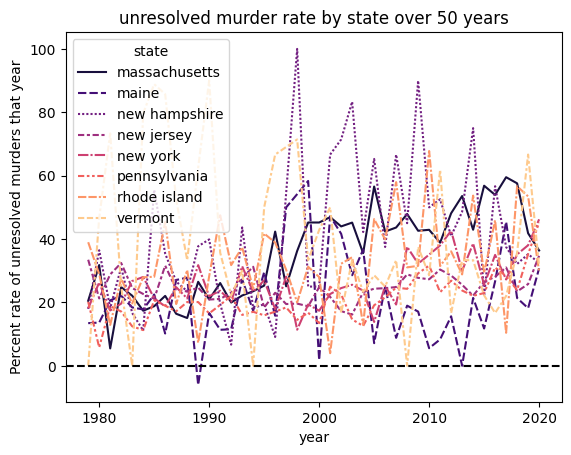

In [ ]:
#graphing the data of each state separately
ax=sns.lineplot(Northeast,x="year",y="unresolved_murder_rate",hue="state",palette='magma',style="state",errorbar=None)
ax.axhline(y=0, color="black", linestyle="dashed")
plt.title("unresolved murder rate by state over 50 years")
plt.xlabel("year")
plt.ylabel("Percent rate of unresolved murders that year")
plt.show()

In [ ]:
p#getting the average of every state together, by year
NortheastAvg=Northeast.groupby("year")["unresolved_murder_rate"].mean().sort_values(ascending = False)
NortheastAvg

,unresolved_murder_rate
year,
2020,39.191154
2019,35.189697
2016,34.731931
2010,33.561230
2009,32.291641
2012,32.158427
2017,31.935801
2011,30.877082
2008,30.244709


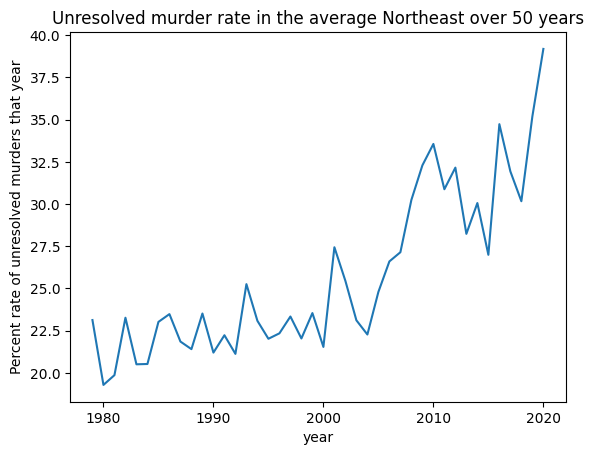

In [ ]:
#graphing the data of all states together
NortheastAvg=pd.DataFrame(NortheastAvg)
sns.lineplot(NortheastAvg,x="year",y="unresolved_murder_rate",errorbar=None)
plt.title("Unresolved murder rate in the average Northeast over 50 years")
plt.xlabel("year")
plt.ylabel("Percent rate of unresolved murders that year")
plt.show()

# Rising Murders, a 50 year study:

Our investigation of the date tells us that we can see a distinct trend over the years. It seems, over time, the unresolved murder rate has risen across all the states in the Northeast, and that certain states seem to have a much higher unresolved murder rate than othes, such as Vermont and New Hampshire, at least according to the first graph. The rare instances in which the rate is negative
 in graph one comes from instances in which more murders were solved that year than went unresolved, which would result in the unresolved rate being negative. as the resolved rate is over 100%, the inverse would be below 0% and thus appear negative. From the data we can see the state with the consistently highest unresolved murder rate is New Hampshire, while Maine seems to be the lowest in general. the assumption that the rate is generally rising is confirmed by the data in the second graph, which clearly shows that the rate has been steadily climbing since about 2000, but was fairly stable before that. due to the fact the unresolved murder rate has only really spiked after 2000, it is within the interest of the Marshall Project to focus its efforts on this particular period(2000s to present), and to better understand the conditions that have led to this outcome.

Question 4

My question asks how accurately we can predict the total number of new crimes per year in the US using data from the past 50 years. This can help us understand whether historical trends in violent and property crimes along with the year can reliably forecast overall crime levels, which is relevant for policymaking and public safety. To asnwer this, I cleaned and filtered the dataset to include only the last 50 years then chose three features, year, new violent crime and new proerty crime. I trained a random forest regressor to predict total crime adn pslit the data into training and testing sets to evaluate the performance. I also visualized models and actual vs. predicted values to assess model fit.

Drop NA Values

In [ ]:
crime = crime.dropna()

Name variables

In [ ]:
x = ['year', 'new_violent_crime', 'new_property_crime']
y = 'new_total_crime'

Label Graph

In [ ]:
current_year = crime['year'].max()
crime_50_years = crime[crime['year'] >= (current_year - 50)]

Plot graph

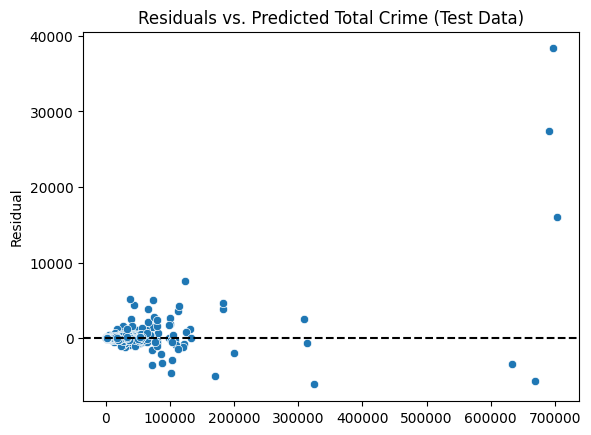

In [ ]:
X = crime_50_years[x]

y = crime_50_years['new_total_crime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model.fit(X_train, y_train)

yhat_test = model.predict(X_test)

residuals_test = y_test - yhat_test

fig, ax = plt.subplots()

sns.scatterplot(x=yhat_test, y=residuals_test, ax=ax)

ax.axhline(y=0, color='black', linestyle='dashed')

ax.set_ylabel("Residual")
ax.set_title("Residuals vs. Predicted Total Crime (Test Data)")

plt.show()

In [ ]:
y_pred = model.predict(X_test)

Look for errors

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1356458.3676693444
R-squared (R2): 0.9991153667432254


In [ ]:
y.isna().values.any()

True

Label Graph

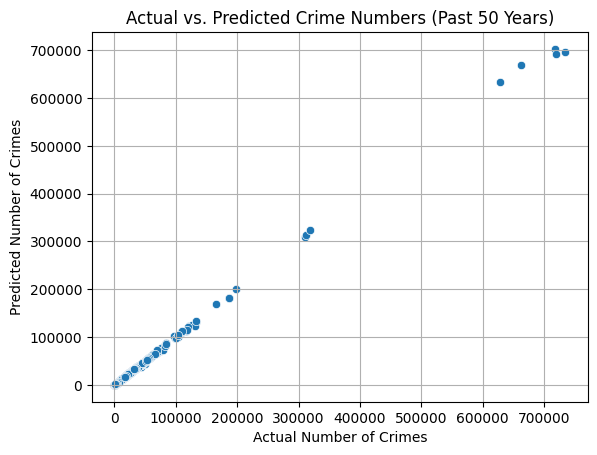

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Number of Crimes")
plt.ylabel("Predicted Number of Crimes")
plt.title("Actual vs. Predicted Crime Numbers (Past 50 Years)")
plt.grid()
plt.show()

Using the data from the past 50 years we were able to predict the number of new crimes total very well. The model used a random forest regressor which we trained on three features, year, new violent crimes and new property crimes. The model achieved an r-squared value of 0.9991, which shows it explained over 99.9% of the variance in total crime counts. The mean squared error was approximately 1,356,458, while it's large numerically it is low relative to the scale of the national crime totals. This shows that when using multiple predictors, not just year alone, we can predict the total number of new crimes with very high precision.